# Problem 1: Quantum Teleportation (Part A)
### Importing Necessary Libraries
Setting up the environment by importing Qiskit tools and visualization libraries.

In [1]:
# Cell 1: Import necessary libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

### Step 1: Arbitrary Qubit Preparation
For Step 1, we must choose arbitrary angles $\theta$ and $\varphi$ between 0.5 and 2.5. We selected $\theta = 1.2$ and $\varphi = 2.1$. We apply these to Qubit 0 to create the unknown state $|\psi\rangle$.

In [2]:
# Define angles and initialize the circuit
theta = 1.2
phi = 2.1

# We need 3 quantum bits and 1 classical bit (to measure Bob's qubit at the end)
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qr, cr)

# --- Step 1: Arbitrary Qubit Preparation ---
# Initialize qubit 0 in unknown state |ψ>
qc.ry(theta, 0)
qc.rz(phi, 0)

qc.barrier();

### Steps 2, 3, & 4: Entanglement, Teleportation, and Quantum Correction
We create the Bell pair on Qubits 1 and 2, apply Alice's operations to Qubits 0 and 1, and perform the fully quantum correction using controlled gates instead of classical measurements.

In [3]:
# Entanglement, Teleportation, and Quantum Correction

# --- Step 2: Create a Bell Pair ---
# Entangle Qubit 1 (Alice) and Qubit 2 (Bob)
qc.h(1)
qc.cx(1, 2)

qc.barrier()

# --- Step 3: Perform the Teleportation Circuit ---
# Alice performs a Bell-basis measurement preparation
qc.cx(0, 1)
qc.h(0)

qc.barrier()

# --- Step 4: Quantum Correction Step ---
# Instead of classical measurement, we use quantum controlled gates
qc.cx(1, 2)
qc.cz(0, 2)

qc.barrier();

### Step 5: Undo the Unitary $U$ and Draw Circuit
To prove teleportation worked, we must undo the unitary operation $U$ on Bob's qubit (Qubit 2). We do this by reversing the order of the gates and using negative angles. Finally, we measure only Bob's qubit and draw the circuit.

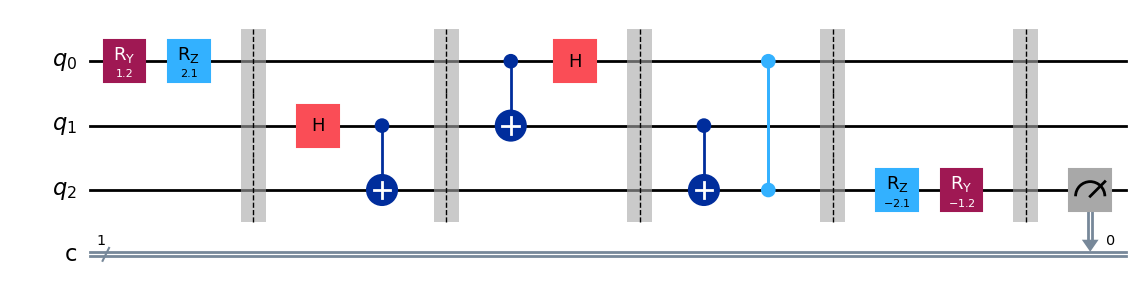

In [4]:
# Cell 4: Undo Unitary, Measure, and Draw

# --- Step 5: Undo the Unitary U ---
# Apply the inverse operations to Qubit 2 in reverse order with negative angles
qc.rz(-phi, 2)
qc.ry(-theta, 2)

qc.barrier()

# --- Step 6: Measurement ---
# Measure Bob's qubit (Qubit 2) into the classical bit (Bit 0)
qc.measure(2, 0)

# Draw the full circuit diagram
qc.draw('mpl')

### Execution and Histogram
We run the simulation with 5000 shots. If the teleportation and correction were successful, Bob should measure state `0` with 100% probability.

Measurement counts: {'0': 5000}


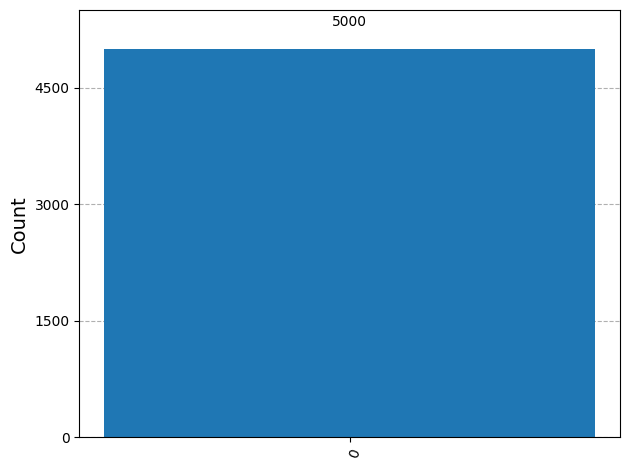

In [5]:
backend = Aer.get_backend('aer_simulator')
job = backend.run(qc, shots=5000)
result = job.result()

counts = result.get_counts()
print("Measurement counts:", counts)

# Plot the histogram
plot_histogram(counts)